## Exploratory Data Analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­ minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

## Data description

**city**: city this user signed up in  
**phone**: primary device for this user  
**signup_date**: date of account registration; in the form ‘YYYY MM DD’  
**last_trip_date**: the last time this user completed a trip; in the form ‘YYYY MM DD’  
**avg_dist**: the average distance in miles per trip taken in the first 30 days after signup  
**avg_rating_by_driver**: the rider’s average rating over all of their trips  
**avg_rating_of_driver**: the rider’s average rating of their drivers over all of their trips  
**surge_pct**: the percent of trips taken with surge multiplier > 1  
**avg_surge**: The average surge multiplier over all of this user’s trips  
**trips_in_first_30_days**: the number of trips this user took in the first 30 days after
signing up  
**ultimate_black_user**: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise  
**weekday_pct**: the percent of the user’s trips occurring during a weekday  



In [44]:
import json 
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from datetime import datetime


In [45]:
file =  "logins.json"
with open(file) as json_data:
    data = json.load(json_data)
    
for key, value in data.items():
    print(key)
    print(value)


login_time
['1970-01-01 20:13:18', '1970-01-01 20:16:10', '1970-01-01 20:16:37', '1970-01-01 20:16:36', '1970-01-01 20:26:21', '1970-01-01 20:21:41', '1970-01-01 20:12:16', '1970-01-01 20:35:47', '1970-01-01 20:35:38', '1970-01-01 20:47:52', '1970-01-01 20:26:05', '1970-01-01 20:31:03', '1970-01-01 20:34:46', '1970-01-01 20:36:34', '1970-01-01 20:39:25', '1970-01-01 20:40:37', '1970-01-01 20:34:58', '1970-01-01 20:43:59', '1970-01-01 20:47:46', '1970-01-01 20:46:34', '1970-01-01 20:56:07', '1970-01-01 20:49:12', '1970-01-01 20:59:06', '1970-01-01 20:59:59', '1970-01-01 21:15:01', '1970-01-01 21:09:24', '1970-01-01 21:19:24', '1970-01-01 21:20:53', '1970-01-01 21:29:19', '1970-01-01 21:58:05', '1970-01-01 21:51:51', '1970-01-01 21:59:40', '1970-01-01 22:08:34', '1970-01-01 22:02:51', '1970-01-01 21:58:32', '1970-01-01 22:02:31', '1970-01-01 22:05:32', '1970-01-01 22:02:46', '1970-01-01 22:10:28', '1970-01-01 22:11:58', '1970-01-01 22:01:05', '1970-01-01 22:19:10', '1970-01-01 22:16:54',

In [46]:
data['login_time'][0:5]

['1970-01-01 20:13:18',
 '1970-01-01 20:16:10',
 '1970-01-01 20:16:37',
 '1970-01-01 20:16:36',
 '1970-01-01 20:26:21']

### Aggregate these login counts based on 15­ minute time intervals

In [118]:
df.head()

""
date
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21


In [141]:
df = pd.DataFrame(np.array(data['login_time']),columns = ["date"])
df['date'] =  pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S',errors='coerce')
df.head()

,date
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [142]:
df.set_index('date', inplace=True)
df.head()

""
date
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21


In [144]:
df['count'] = 1
df.head()

,count
date,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [153]:
agg = df.resample('15T').sum()
agg.sort_values(by=['count'], ascending = False).head(15)

,count
date,
1970-03-01 04:30:00,73
1970-04-04 05:30:00,66
1970-04-04 01:30:00,64
1970-04-04 01:15:00,63
1970-04-01 23:30:00,60
1970-04-04 05:00:00,60
1970-04-04 04:45:00,59
1970-04-04 05:15:00,59
1970-04-04 01:45:00,56


The most logins within a 15-minute period occured on March 1st at 4:30am, with 73 logins. This number is not too far off from the remainder of the login counts(with the second highest being 66 logins in a 15-minute period). The top 15 datetimes for login activitity all occured in either April or March, with April 4th being the most common date. 

### Visualize the Results

In [164]:
agg['count'].describe()

count    9788.000000
mean        9.515938
std         8.328818
min         0.000000
25%         3.000000
50%         7.000000
75%        13.000000
max        73.000000
Name: count, dtype: float64

In [208]:
agg.tail()

,count
date,
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2
1970-04-13 18:30:00,7
1970-04-13 18:45:00,6


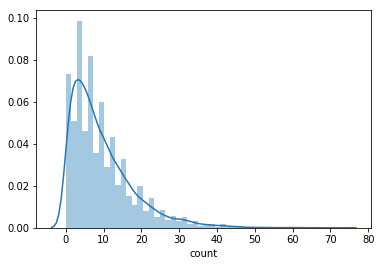

In [168]:
%matplotlib inline  
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(agg['count'])


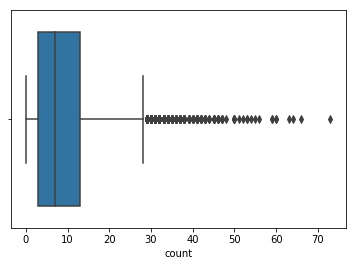

In [169]:
sns.boxplot(agg['count'])

Text(0.5,0,'Time of Day (HH:MM:SS)')

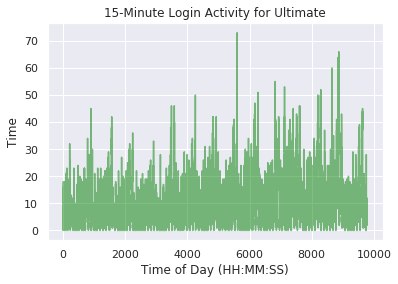

In [243]:
fig, ax = plt.subplots()

plt.plot(agg['count'].values.astype(float), color='green',  alpha = 0.5)
plt.title('15-Minute Login Activity for Ultimate')      
plt.ylabel('Time')
plt.xlabel('Time of Day (HH:MM:SS)')

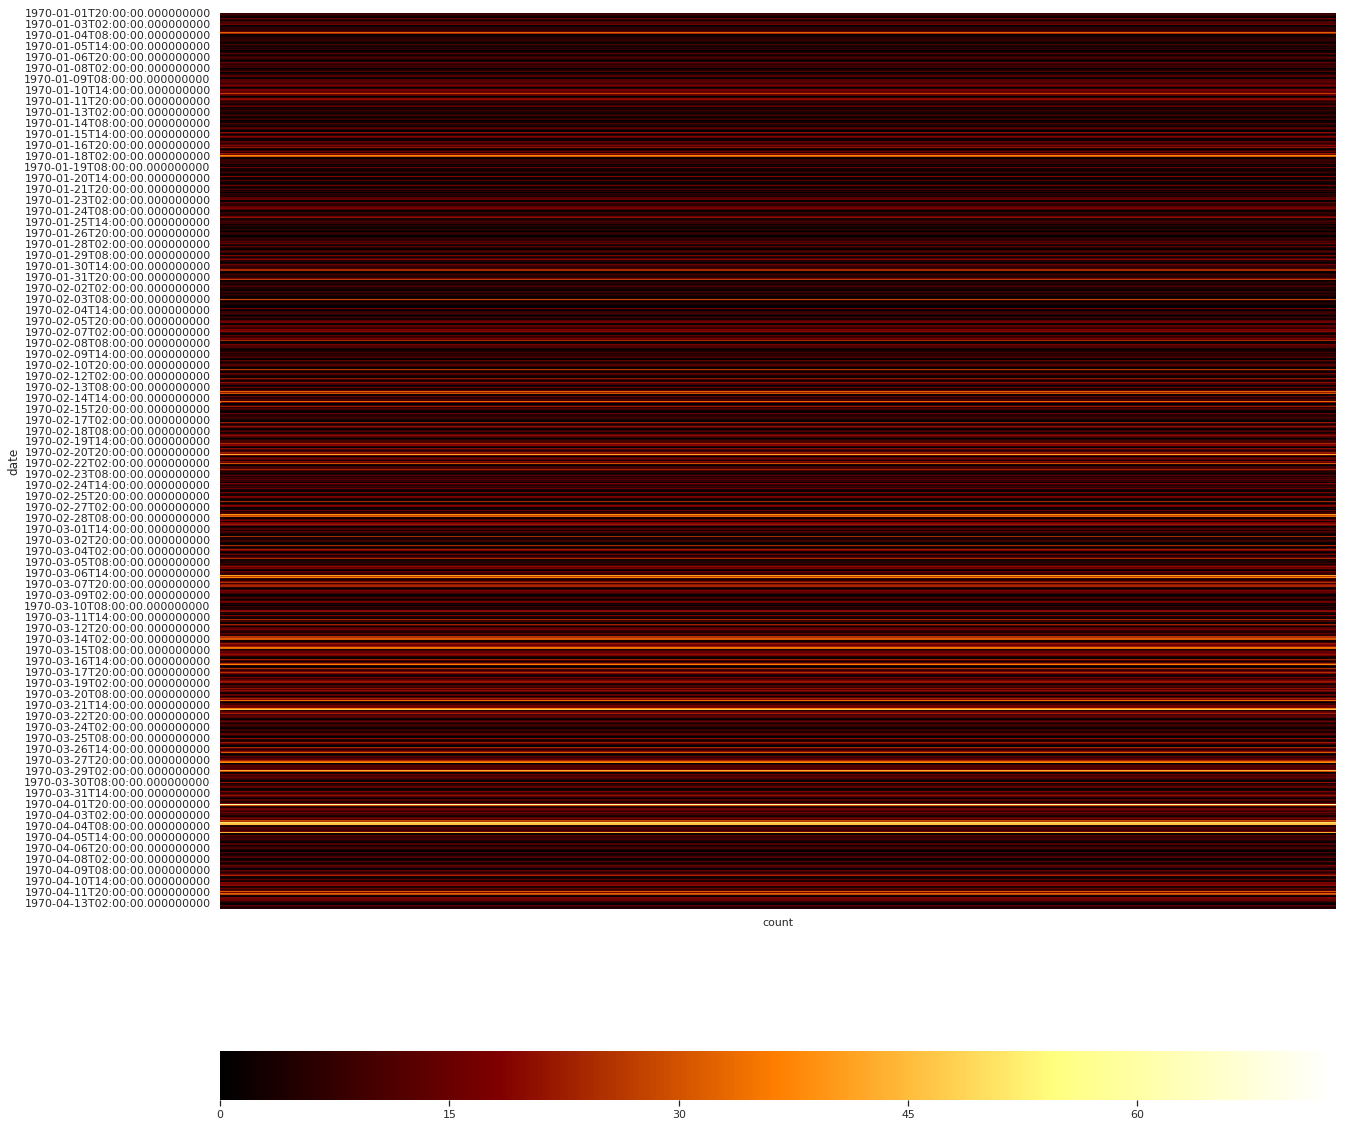

In [270]:

grid_kws = {"height_ratios": (.9, .05), "hspace": .3}
fig, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(20, 20))
ax = sns.heatmap(agg, ax=ax,
                  cmap="afmhot",
                  cbar_ax=cbar_ax,
                  cbar_kws={"orientation": "horizontal"})

The majority of the data fall within 3 to 13 logins per 15-minute interval. However, as illustrated in both the histogram and boxplot above, there are several outliers.  

We see a spike on the first of March at 73 logins per 15-minute interval. In the heatmap plot directly above, we see more pronounced activity in the Spring with a record day at the beginning of April.

## Experiment and Metrics Design 
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two ­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
* What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
* Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
    * how you will implement the experiment
    * what statistical test(s) you will conduct to verify the significance of theobservation
    * how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

**key metric of success**  
Ultimately, we care about maximizing revenue through the experiment, so I would use "profits above expected" as my key metric of success; meaning, how much additional revenue did this experiemnt bring in compared to our projections (after reimbursements were awarded)? For the sake of the experiment, however, I will use the metric of the number of rides accepted by the driver as the key indicator metric.  

**The experiment**  
I would conduct an A/B hypothesis test, where a random sample of X% of the Ultimate riders are accepted into the toll reimbursement progam.  

Null hypohtesis: There *is no* difference in average number of rides accepted by the Ultimate drivers when participating in the program  

Alternative hypohtesis: There *is* difference in average number of rides accepted by the Ultimate drivers when participating in the program.  

I would conduct a paired student's t-test and compare the resulting t-test statistic value to an alpha of 0.05. IF t < p, then then we can reject the null hypothesis and the experiment was successful. 


## Predictive Modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account inJanuary 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.
* Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
* Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
* Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­ term rider retention (again, a few sentences will suffice).

In [283]:
from pandas.io.json import json_normalize

file =  "ultimate_data_challenge.json"
with open(file) as json_data:
    data = json.load(json_data)
    
data[1]

{'city': 'Astapor',
 'trips_in_first_30_days': 0,
 'signup_date': '2014-01-29',
 'avg_rating_of_driver': 5.0,
 'avg_surge': 1.0,
 'last_trip_date': '2014-05-05',
 'phone': 'Android',
 'surge_pct': 0.0,
 'ultimate_black_user': False,
 'weekday_pct': 50.0,
 'avg_dist': 8.26,
 'avg_rating_by_driver': 5.0}

In [285]:
df = json_normalize(data)
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


### What fraction of the observed users were retained?  

We observe that 15,390 of these users did not take a trip in the last 30 days.

In [289]:
df['trips_in_first_30_days'].loc[df['trips_in_first_30_days'] == 0].count()

15390

This corresponds to 30.8% of these users lost, and a 69.2% retainment rate.

In [303]:
df['trips_in_first_30_days'].loc[df['trips_in_first_30_days'] == 0].count()/len(df.index)

0.3078

In [304]:
lost = df.loc[df['trips_in_first_30_days'] == 0]
lost.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
13,3.04,5.0,4.0,1.38,King's Landing,2014-06-08,iPhone,2014-01-29,50.0,0,False,50.0
17,2.38,4.8,3.9,1.00,King's Landing,2014-07-01,iPhone,2014-01-12,0.0,0,True,95.2
19,12.08,5.0,5.0,1.17,King's Landing,2014-06-03,iPhone,2014-01-02,33.3,0,False,66.7
22,11.47,5.0,NaN,1.00,Winterfell,2014-05-02,iPhone,2014-01-24,0.0,0,False,100.0


In [305]:
retain = df.loc[df['trips_in_first_30_days'] > 1]
retain.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0


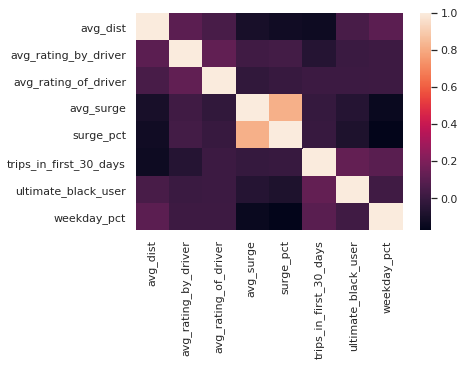

In [308]:
import seaborn as sns
corr = retain.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


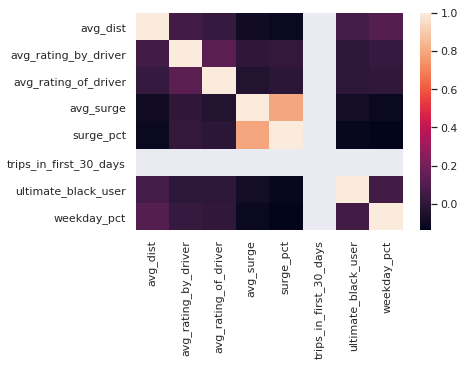

In [309]:
import seaborn as sns
corr = lost.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


## Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system.

Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

In [354]:
pred = df
pred.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,1,2014-06-17,2,2014-01-25,15.4,1,True,46.2
1,8.26,5.0,5.0,1.00,0,2014-05-05,1,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,0,2014-01-07,2,2014-01-06,0.0,1,False,100.0
3,2.36,4.9,4.6,1.14,1,2014-06-29,2,2014-01-10,20.0,1,True,80.0
4,3.13,4.9,4.4,1.19,2,2014-03-15,1,2014-01-27,11.8,1,False,82.4


Let's change out predictor var, 'trips in 30 days', to be a binary classifier. 1 is action and 0 is inactive.

In [355]:
a = np.array(pred['trips_in_first_30_days'].values.tolist())

pred['trips_in_first_30_days'] = np.where(a > 1, 1, a).tolist()
pred.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,1,2014-06-17,2,2014-01-25,15.4,1,True,46.2
1,8.26,5.0,5.0,1.00,0,2014-05-05,1,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,0,2014-01-07,2,2014-01-06,0.0,1,False,100.0
3,2.36,4.9,4.6,1.14,1,2014-06-29,2,2014-01-10,20.0,1,True,80.0
4,3.13,4.9,4.4,1.19,2,2014-03-15,1,2014-01-27,11.8,1,False,82.4


In [356]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

We remove last trip date from the predictor variables.

In [357]:
pred.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,1,2014-06-17,2,2014-01-25,15.4,1,True,46.2
1,8.26,5.0,5.0,1.00,0,2014-05-05,1,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,0,2014-01-07,2,2014-01-06,0.0,1,False,100.0
3,2.36,4.9,4.6,1.14,1,2014-06-29,2,2014-01-10,20.0,1,True,80.0
4,3.13,4.9,4.4,1.19,2,2014-03-15,1,2014-01-27,11.8,1,False,82.4


In [358]:
X = pred.iloc[:,np.r_[0:5,6,8,10:12]]
y = pred.iloc[:,9]


Convert the categorial data to numeric data

In [359]:
X['city'] = X['city'].astype('category')
X['city'] = X['city'].cat.codes

/home/thebbennett/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/thebbennett/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [360]:
X['phone'] = X['phone'].astype('category')
X['phone'] = X['phone'].cat.codes
X.head()

/home/thebbennett/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/thebbennett/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,1,2,15.4,True,46.2
1,8.26,5.0,5.0,1.00,0,1,0.0,False,50.0
2,0.77,5.0,4.3,1.00,0,2,0.0,False,100.0
3,2.36,4.9,4.6,1.14,1,2,20.0,True,80.0
4,3.13,4.9,4.4,1.19,2,1,11.8,False,82.4


In [364]:
X.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,1.136040,1.683720,8.849536,60.926084
std,5.707357,0.446652,0.617338,0.222336,0.882558,0.481759,19.958811,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,1.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,1.000000,2.000000,0.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,2.000000,2.000000,8.600000,100.000000
max,160.960000,5.000000,5.000000,8.000000,2.000000,2.000000,100.000000,100.000000


In [371]:
X = X.fillna(0)


In [372]:
X.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,weekday_pct
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.758950,3.854082,1.074764,1.136040,1.683720,8.849536,60.926084
std,5.707357,0.538617,1.788881,0.222336,0.882558,0.481759,19.958811,37.081503
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.000000,1.000000,0.000000,1.000000,0.000000,33.300000
50%,3.880000,5.000000,4.700000,1.000000,1.000000,2.000000,0.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,2.000000,2.000000,8.600000,100.000000
max,160.960000,5.000000,5.000000,8.000000,2.000000,2.000000,100.000000,100.000000


In [373]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X.head()



,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,1,2,15.4,True,46.2
1,8.26,5.0,5.0,1.00,0,1,0.0,False,50.0
2,0.77,5.0,4.3,1.00,0,2,0.0,False,100.0
3,2.36,4.9,4.6,1.14,1,2,20.0,True,80.0
4,3.13,4.9,4.4,1.19,2,1,11.8,False,82.4


In [387]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [375]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[  79 3795]
 [  85 8541]]


In [376]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.69


In [377]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.48      0.02      0.04      3874
          1       0.69      0.99      0.81      8626

avg / total       0.63      0.69      0.57     12500



In [399]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [414]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

final_model = XGBClassifier()
final_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [415]:
feat_imp = pd.Series(final_model.get_booster().get_fscore()).sort_values(ascending=False)


Text(0,0.5,'Feature Importance Score')

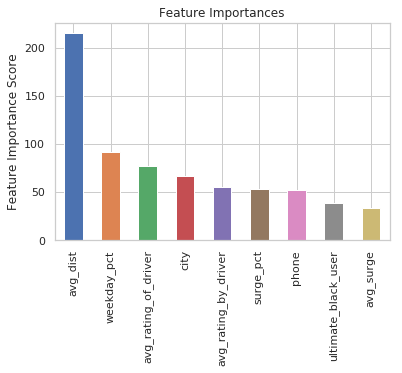

In [416]:
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')


In [417]:
y_pred = final_model.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 69.01%


/home/thebbennett/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



### How valid is your model? Include any key indicators of model performance.
The model's accuray is 69%. The model is more successful at predicting true positions than true negatives. The F-1 score, which shows the balance between precision and recall, indicates a strong performance in predicting whether a rider will be active, but not if a rider will be inactive. Recall is low for predicting inactive members. 

The most important feature is "average distance" travelled by the user, which suggests that the distance a user travels is highly correlated with whether a user will be retained. I would suggest offering rewards to loyal users for travelling long distances.